In [1]:
RAW_OUTPUT_FOLDER = "../crawler/ctsv_scraper/output"

In [2]:
cleaned_user_filename = "user_info_deep_cleaned.csv"
cleaned_activity_filename = "activity_info_deep_cleaned.csv"
cleaned_interaction_filename = "user_activity_interaction_deep_cleaned.csv"

In [3]:
import os 

import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

## User

In [4]:
df_user = pd.read_csv(os.path.join(RAW_OUTPUT_FOLDER, cleaned_user_filename))
df_user.sample(6)

,id,fullName,email,faculty
55839,20230298,NGUYỄN THU TRANG,trang.nt230298@sis.hust.edu.vn,Trường Hóa và Khoa học Sự sống
39800,20215444,LÊ TUẤN PHI,phi.lt215444@sis.hust.edu.vn,Trường Công nghệ Thông tin và Truyền thông
47005,20223162,Nguyễn Thị Khánh Linh,linh.ntk223162@sis.hust.edu.vn,Viện Kinh tế và Quản lý
7521,20192015,Nguyễn Sỹ Phong,phong.ns192015@sis.hust.edu.vn,Trường Điện - Điện tử
14296,20172807,Dương Đình Thái,thai.dd172807@sis.hust.edu.vn,Trường Điện - Điện tử
8725,20185747,Trịnh Kim Cương,cuong.tk185747@sis.hust.edu.vn,Trường Cơ khí


In [5]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59273 entries, 0 to 59272
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        59273 non-null  object
 1   fullName  59273 non-null  object
 2   email     59273 non-null  object
 3   faculty   59262 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


In [6]:
year_of_start = df_user['id'].apply(lambda x: int(x[:4]))
year_of_start

0        2018
1        2017
2        2019
3        2017
4        2019
         ... 
59268    2023
59269    2023
59270    2023
59271    2023
59272    2023
Name: id, Length: 59273, dtype: int64

In [7]:
year_min, year_max = min(year_of_start), max(year_of_start)
year_max

2023

In [8]:
std_by_years = year_of_start.value_counts().sort_index()
years = std_by_years.index
num_std = std_by_years.values

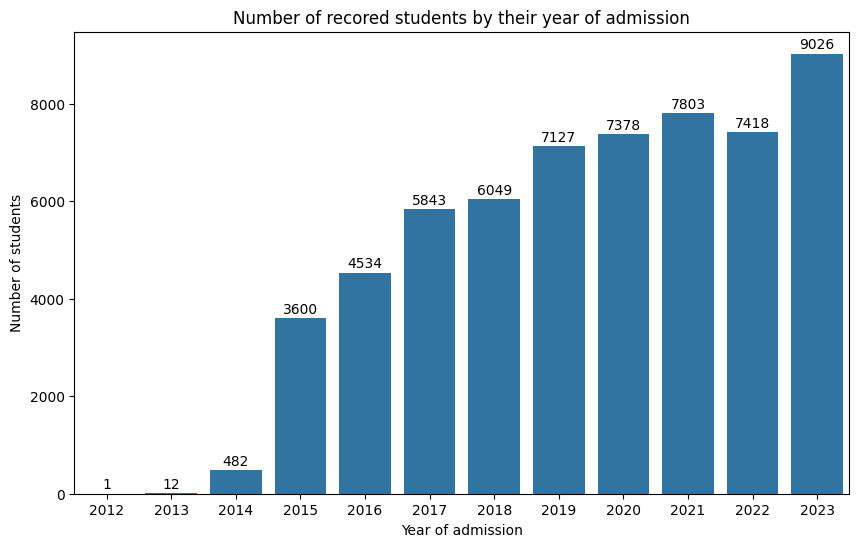

In [9]:
plt.figure(figsize=(10, 6))
sns.barplot(x=years, y=num_std)
for i in range(len(years)):
    plt.text(i, num_std[i] + 100, num_std[i], ha = 'center')
plt.xlabel("Year of admission")
plt.ylabel("Number of students")
plt.title("Number of recored students by their year of admission")
plt.show() 

In [10]:
faculty_rename = {
    "Trường Cơ Khí": "Trường Cơ khí", 
    "Trường Hóa và Khoa học sự sống": "Trường Hóa và Khoa học Sự sống", 
    "Viện Vật lý kỹ thuật": "Viện Vật lý Kỹ thuật", 
    "Trường Vật Liệu": "Trường Vật liệu",
    "Trường Công nghệ thông tin & Truyền thông": "Trường Công nghệ Thông tin và Truyền thông", 
    "Trường Công nghệ thông tin và Truyền thông": "Trường Công nghệ Thông tin và Truyền thông"
}
df_user.faculty.replace(faculty_rename, inplace=True)

print("Number of students by department")
df_user.faculty.value_counts()

Number of students by department


Trường Cơ khí                                 13991
Trường Điện - Điện tử                         13482
Trường Hóa và Khoa học Sự sống                 8849
Trường Công nghệ Thông tin và Truyền thông     8740
Viện Kinh tế và Quản lý                        3944
Trường Vật liệu                                3642
Viện Toán ứng dụng và Tin học                  1844
Viện Ngoại ngữ                                 1646
Viện Vật lý Kỹ thuật                           1424
SIE                                             914
Viện Sư phạm Kỹ thuật                           424
Trung tâm Đào tạo liên tục                      315
Ban CTSV                                         47
Name: faculty, dtype: int64

## Activity

In [11]:
df_activity = pd.read_csv(os.path.join(RAW_OUTPUT_FOLDER, cleaned_activity_filename))
df_activity.head()

,id,title,type,desc,btc,createdTime,startTime,finishTime,deadlineTime,criteria
0,135,Tọa đàm đối thoại giữa sinh viên và lãnh đạo n...,Sinh hoạt chuyên đề,"Các bạn sinh viên thân mến, Gần đây, Trường ch...",Đại học Bách Khoa Hà Nội,2019-11-26 18:03:25,2019-11-26 18:00:00,2019-11-27 21:00:00,2019-11-27 21:00:00,"[{'CGroupId': 0, 'CId': 67, 'CName': 'Tham gia..."
1,136,Ngày hội tuyển dụng của công ty LG Electronics,Hội thảo hướng nghiệp,Công ty LG Electronics Việt Nam Hải Phòng (LGE...,Ban CTSV,2019-11-27 14:51:13,2019-11-29 08:30:00,2019-11-29 11:30:00,2019-11-29 11:30:00,"[{'CGroupId': 0, 'CId': 61, 'CName': 'Tham gia..."
2,137,Cổ vũ Giải bóng đá nam sinh viên các trường...,Hoạt động thể thao,Giải bóng đá sinh viên Hà Nội là giải đấu thườ...,Ban CTSV,2019-12-02 11:16:37,2019-12-02 08:00:00,2019-12-02 10:30:00,2019-12-02 10:30:00,"[{'CGroupId': 0, 'CId': 62, 'CName': 'Tham gia..."
3,146,"Lễ tổng kết cuộc thi ""Tuổi trẻ học tập và làm ...",Sinh hoạt chuyên đề,- Tiếp tục đẩy mạnh học tập và làm theo tư tưở...,Ban CTSV,2019-12-11 09:37:19,2019-12-14 18:00:00,2019-12-14 22:00:00,2019-12-14 22:00:00,"[{'CGroupId': 0, 'CId': 60, 'CName': 'Tham gia..."
4,147,Họp Chi bộ 12/2019,Hiến máu nhân đạo,Kiểm điểm đảng viên Triển khai công tác khác c...,Chi bộ SV II,2019-12-11 14:25:48,2019-12-08 17:00:00,2019-12-08 19:30:00,2019-12-08 19:30:00,"[{'CGroupId': 0, 'CId': 55, 'CName': 'Tham gia..."


In [12]:
df_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4537 entries, 0 to 4536
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            4537 non-null   int64 
 1   title         4537 non-null   object
 2   type          4537 non-null   object
 3   desc          3306 non-null   object
 4   btc           4537 non-null   object
 5   createdTime   4537 non-null   object
 6   startTime     4537 non-null   object
 7   finishTime    4537 non-null   object
 8   deadlineTime  4537 non-null   object
 9   criteria      4537 non-null   object
dtypes: int64(1), object(9)
memory usage: 354.6+ KB


In [13]:
import datetime
import numpy as np 

date = datetime.date(2023, 1, 1)
df_activity.startTime = df_activity.startTime.apply(lambda x: pd.to_datetime(x.split(" ")[0]))
df_activity.startTime

0      2019-11-26
1      2019-11-29
2      2019-12-02
3      2019-12-14
4      2019-12-08
          ...    
4532   2023-12-23
4533   2023-12-23
4534   2023-12-21
4535   2023-12-21
4536   2023-12-22
Name: startTime, Length: 4537, dtype: datetime64[ns]

In [14]:
feb23 = np.datetime64(datetime.date(2023, 2, 1))
july23 = np.datetime64(datetime.date(2023, 7, 30))

type_of_activity = df_activity[
    (df_activity.startTime >= feb23) 
    & (df_activity.startTime <= july23)
].type.value_counts().sort_values(ascending=False)


Text(0.5, 1.0, 'Number of activities by their category in Semester 2022.2')

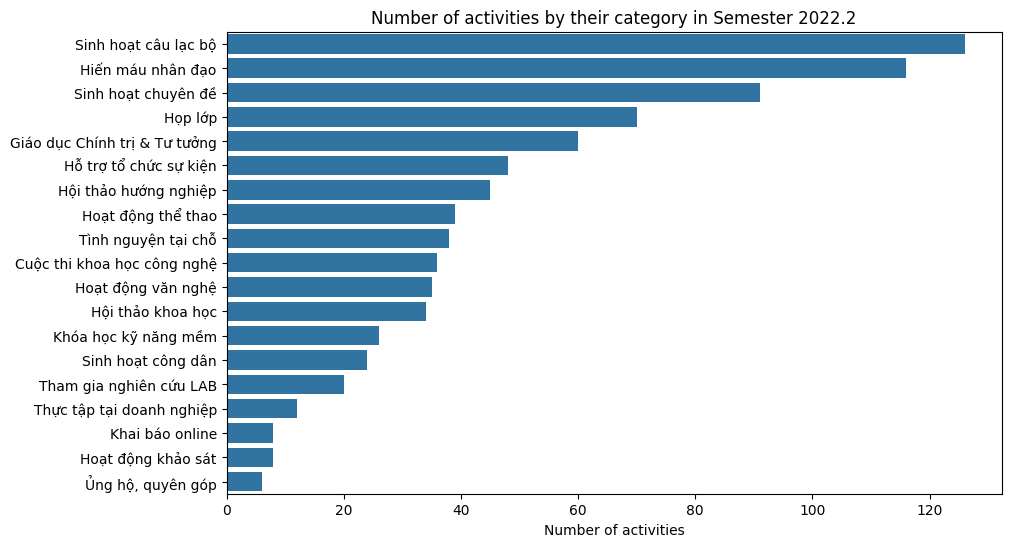

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(y=type_of_activity.index,x=type_of_activity.values, orient='h')
plt.ylabel("")
plt.xlabel("Number of activities")
plt.title("Number of activities by their category in Semester 2022.2")

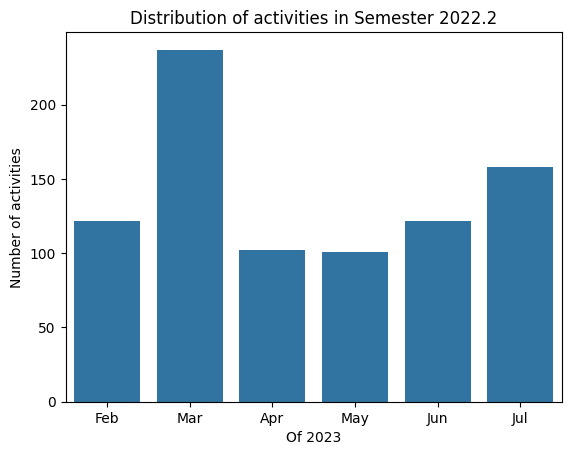

In [16]:
sample_df = df_activity[
    (df_activity.startTime >= feb23) 
    & (df_activity.startTime <= july23)
]
t = sample_df.startTime.apply(lambda x: x.month)
t = t.value_counts().sort_index()

sns.barplot(x=t.index, y=t.values)
plt.xticks(
    ticks=range(len(t.index)), 
    labels=['Feb', "Mar", "Apr", "May", "Jun", "Jul"]
)

plt.xlabel("Of 2023")
plt.ylabel("Number of activities")
plt.title("Distribution of activities in Semester 2022.2")
plt.show()

In [17]:
import json 
import re 

def read_criteria(x): 
    x = re.sub("\"", '\\"', x)
    x = re.sub("\'", "\"", x)
    return json.loads(x)

df_activity['criteria_json'] = df_activity.criteria.apply(lambda x: read_criteria(x))

criteria_dict = {}
for row in df_activity['criteria_json']: 
    for c in row: 
        criteria_dict[c['CId']] = c['CName']


In [18]:
sample_df = df_activity[
    (df_activity.startTime >= feb23) 
    & (df_activity.startTime <= july23)
]
criteria_num_dict = {}
for row in sample_df['criteria_json']: 
    for c in row: 
        criteria_num_dict[c['CId']] = criteria_num_dict.get(c['CId'], 0) + 1

print("In semester 2022.2, What is the hardest criteria to be achieved?")

In semester 2022.2, What is the hardest criteria to be achieved?


In [19]:
t = list(criteria_num_dict.items())
t = sorted(t, key= lambda x: x[1])
print("Criteria with the least number of activities:")
_ = [
    print(
        f"{x[1]} time(s):", criteria_dict.get(x[0], f"Criteria with id: {x[0]}")
    ) for x in t[:10]
]

Criteria with the least number of activities:
1 time(s): Khai báo thông tin liên lạc và nơi cư trú theo yêu cầu của Nhà trường
1 time(s): Nắm vững quy định và quy chế của Nhà trường
1 time(s): Tham gia hiến máu nhân đạo do Trường và các tổ chức hợp pháp phát động, tổ chức
1 time(s): Hiểu biết và chấp hành pháp luật của Nhà nước, quy định của nhà trường và nơi cư trú
1 time(s): Tham gia phong trào "cốc trà đá vì cộng đồng"," tuổi trẻ Bách khoa Nhân ái"
1 time(s): Nhận bằng khen, huy chương tương đương cấp Bộ trở lên
1 time(s): Đạt chứng chỉ ngoại ngữ tương đương Toeic 600 điểm trở lên
1 time(s): Đạt danh hiệu Sinh viên năm tốt từ cấp Trường trở lên
2 time(s): Được giấy khen, bằng khen của tổ chức Đoàn, Hội, Nhà trường hoặc chính quyền địa phương.
4 time(s): Đạt loại Khá trở lên khi tham gia học "Lớp bồi dưỡng nhận thức về Đảng"


## User-Activity Interaction

In [20]:
df_interaction = pd.read_csv(os.path.join(RAW_OUTPUT_FOLDER, cleaned_interaction_filename))
df_interaction.head(10)

/var/folders/27/sl65zrhj4fj1gnqcggjy0_9c0000gn/T/ipykernel_52680/1756908646.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_interaction = pd.read_csv(os.path.join(RAW_OUTPUT_FOLDER, cleaned_interaction_filename))


,user_id,activity_id,accepted_status
0,20186237,135,2
1,20170351,135,2
2,20191797,135,2
3,20174071,135,1
4,20193457,135,1
5,20174341,135,2
6,20195864,135,1
7,20191875,135,1
8,20182068,135,2
9,20193964,135,1


In [21]:
df_interaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287972 entries, 0 to 3287971
Data columns (total 3 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   user_id          object
 1   activity_id      int64 
 2   accepted_status  int64 
dtypes: int64(2), object(1)
memory usage: 75.3+ MB


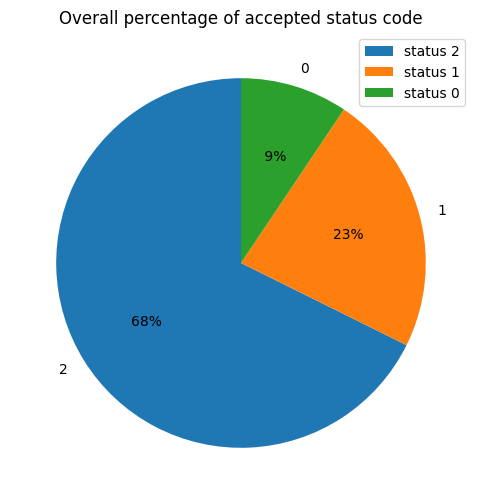

In [22]:
accepted_status_s = df_interaction.accepted_status.value_counts()

plt.figure(figsize=(10, 6))
plt.pie(x=accepted_status_s.values, 
        labels=accepted_status_s.index, 
        autopct="%2.f%%", 
        startangle=90,
)
L = plt.legend()
[L.get_texts()[i].set_text(f'status {L.get_texts()[i].get_text()}') for i in range(len(accepted_status_s))]
plt.title("Overall percentage of accepted status code")
plt.show()

"Ban CTSV" student is always accepted? 

In [23]:
ctsv_std = df_user[df_user.faculty == "Ban CTSV"]
ctsv_std.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 215 to 59261
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        47 non-null     object
 1   fullName  47 non-null     object
 2   email     47 non-null     object
 3   faculty   47 non-null     object
dtypes: object(4)
memory usage: 1.8+ KB


In [24]:
ctsv_interaction = df_interaction[df_interaction.user_id.isin(ctsv_std.id)]
ctsv_interaction.head()

,user_id,activity_id,accepted_status
786557,20186312,2815,2
787025,20190170,2815,1
789426,20190168,2815,2
790312,20200856,2815,2
792404,20186323,2828,2


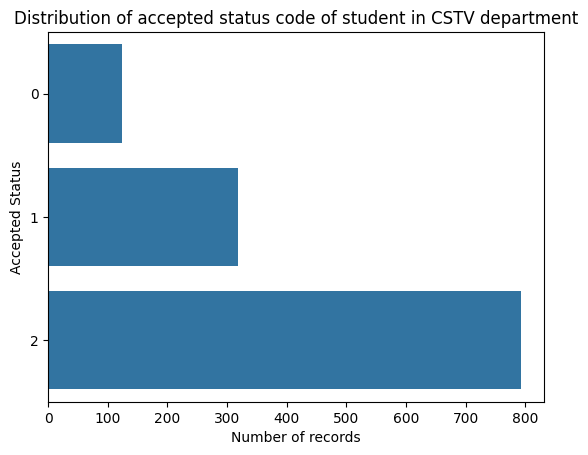

In [25]:
ctsv_status_s = ctsv_interaction.accepted_status.value_counts().sort_index()
sns.barplot(y=ctsv_status_s.index, x=ctsv_status_s.values, orient='h')
plt.ylabel("Accepted Status")
plt.xlabel("Number of records")
plt.title("Distribution of accepted status code of student in CSTV department")
plt.show()